# Imports

In [82]:
import pm4py
import pandas as pd
from Julia import tree_to_tptp
from example_usage import use_provers
from create_thesis_with_2_spec import create_thesis_with_2_spec, LogicFunctions
import os

# Problem1

parsing log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 1560.86it/s]
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/conversion/log/variants/to_data_frame.py:73: UserWarning: no explicit representation of timezones available for np.datetime64
  ev[attr] = np.datetime64(ev[attr])
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home

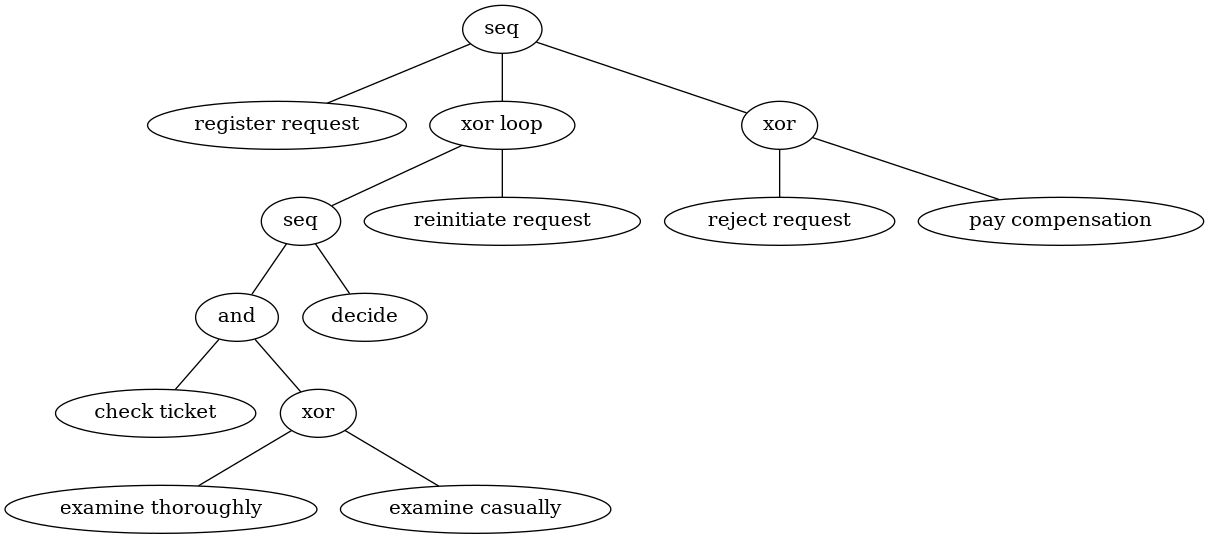

Seq3(1]register_request, Loop(2]l_s, Seq2(3]And2(4]a2_s, check_ticket, Xor2(5]x2_s, examine_thoroughly, examine_casually, x2_e[5), a2_e[4), decide[3), reinitiate_request[2), Xor2(2]x2_s, pay_compensation, reject_request, x2_e[2)[1)
ini: register_request
fin: x2_e

Wynik: 
ForAll(~((l_s) ^ (a2_s | decide)))
ForAll(~((l_s | decide) ^ (x2_s | x2_e)))
ForAll(~((l_s) ^ (reinitiate_request)))
ForAll(~((x2_s) ^ (examine_casually)))
Exist(a2_s)
Exist(a2_s | a2_e)
ForAll((check_ticket) => Exist(a2_e))
ForAll(~((a2_s | decide) ^ (reinitiate_request)))
ForAll(~((examine_thoroughly) ^ (x2_e)))
ForAll(((examine_thoroughly) | (examine_casually)) => Exist(x2_e))
ForAll(~((examine_thoroughly) ^ (examine_casually)))
ForAll((a2_s | decide) => ((Exist(reinitiate_request) ^ Exist(a2_s | decide)) | (~(Exist(reinitiate_request)))))
ForAll(~((register_request) ^ (x2_s | x2_e)))
ForAll(~((register_request) ^ (l_s | decide)))
ForAll(~((pay_compensation) ^ (reject_request)))
ForAll((x2_s) => ((Exist(pay_compens

In [83]:
log = pm4py.read_xes("Data/running-example.xes")

process_tree = pm4py.discover_process_tree_inductive(
    log, 0.0, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_process_tree(process_tree)
tree_to_tptp(process_tree, "our_problems/problem_1.p", rule_prefix="A")
print("\n\n\n")
print(use_provers("our_problems/problem_1.p"))

# Problem2

/tmp/ipykernel_357337/3333826199.py:1: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  log = pm4py.format_dataframe(pd.read_csv("Data/repairExample.csv", sep=','), case_id='Case ID', activity_key='Activity', timestamp_key='Start Timestamp')
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_

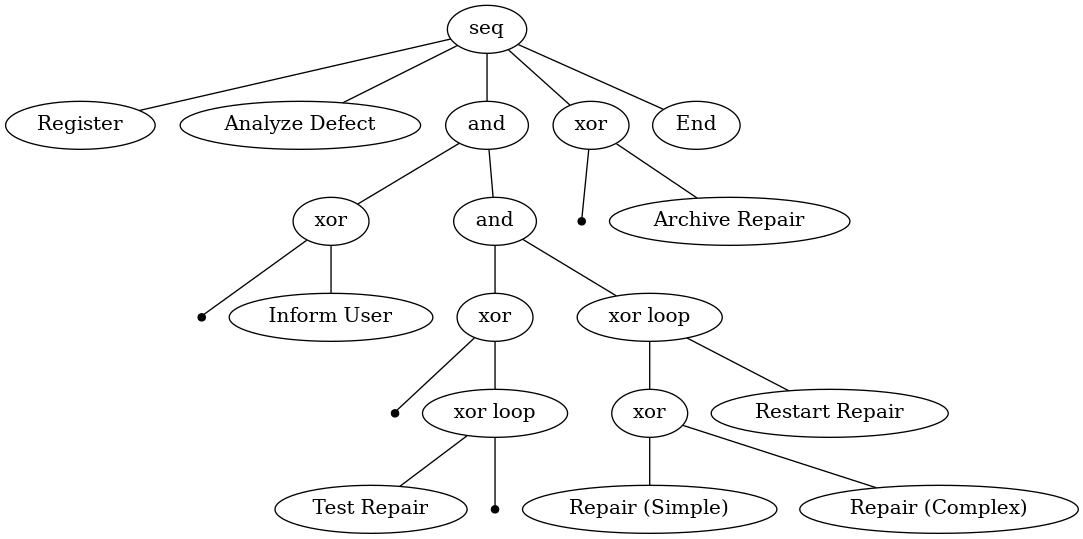

Seq5(1]Register, Analyze_Defect, And2(2]a2_s, Xor2(3]x2_s, tau, Inform_User, x2_e[3), And2(3]a2_s, Xor2(4]x2_s, tau, Loop(5]l_s, Test_Repair, tau[5), x2_e[4), Loop(4]l_s, Xor2(5]x2_s, Repair_Complex_, Repair_Simple_, x2_e[5), Restart_Repair[4), a2_e[3), a2_e[2), Xor2(2]x2_s, tau, Archive_Repair, x2_e[2), End[1)
ini: Register
fin: End

Wynik: 
ForAll((x2_s | x2_e) => ((Exist(Restart_Repair) ^ Exist(x2_s | x2_e)) | (~(Exist(Restart_Repair)))))
ForAll((a2_s) => (Exist(x2_s | x2_e) ^ Exist(l_s | x2_e)))
ForAll(((tau) | (Archive_Repair)) => Exist(x2_e))
ForAll(~((tau) ^ (x2_e)))
ForAll(~((Repair_Complex_) ^ (x2_e)))
ForAll(~((Analyze_Defect) ^ (x2_s | x2_e)))
ForAll(((tau) | (l_s | Test_Repair)) => Exist(x2_e))
ForAll(~((x2_s | x2_e) ^ (Restart_Repair)))
ForAll(~((tau) ^ (Archive_Repair)))
ForAll(~((x2_s) ^ (Repair_Simple_)))
Exist(a2_s)
ForAll(~((Register) ^ (Analyze_Defect)))
ForAll((x2_s) => ((Exist(tau) ^ ~(Exist(l_s | Test_Repair))) | (~(Exist(tau)) ^ Exist(l_s | Test_Repair))))
ForAll

In [84]:
log = pm4py.format_dataframe(pd.read_csv("Data/repairExample.csv", sep=','), case_id='Case ID', activity_key='Activity', timestamp_key='Start Timestamp')

process_tree = pm4py.discover_process_tree_inductive(log, 0.0, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_process_tree(process_tree)
tree_to_tptp(process_tree, "our_problems/problem_2.p", rule_prefix="B")
print("\n\n\n")
print(use_provers("our_problems/problem_2.p"))

# Problem3

/tmp/ipykernel_357337/614968535.py:1: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  log = pm4py.format_dataframe(pd.read_csv("Data/repairExample.csv", sep=','),
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/sit

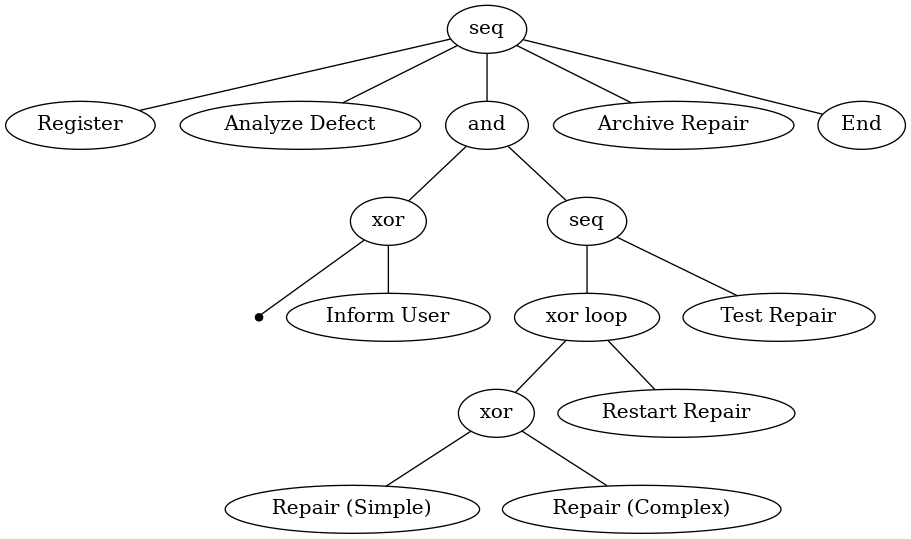

Seq5(1]Register, Analyze_Defect, And2(2]a2_s, Xor2(3]x2_s, tau, Inform_User, x2_e[3), Seq2(3]Loop(4]l_s, Xor2(5]x2_s, Repair_Complex_, Repair_Simple_, x2_e[5), Restart_Repair[4), Test_Repair[3), a2_e[2), Archive_Repair, End[1)
ini: Register
fin: End

Wynik: 
ForAll((x2_s | x2_e) => ((Exist(Restart_Repair) ^ Exist(x2_s | x2_e)) | (~(Exist(Restart_Repair)))))
ForAll(~((Register) ^ (Archive_Repair)))
ForAll(~((tau) ^ (x2_e)))
ForAll(~((Repair_Complex_) ^ (x2_e)))
ForAll(~((x2_s | x2_e) ^ (Restart_Repair)))
ForAll(~((x2_s) ^ (Repair_Simple_)))
Exist(a2_s)
ForAll(~((Register) ^ (Analyze_Defect)))
ForAll((x2_s) => ((Exist(Repair_Complex_) ^ ~(Exist(Repair_Simple_))) | (~(Exist(Repair_Complex_)) ^ Exist(Repair_Simple_))))
ForAll(~((a2_s | a2_e) ^ (Archive_Repair)))
ForAll(~((Analyze_Defect) ^ (Archive_Repair)))
ForAll((x2_s) => ((Exist(tau) ^ ~(Exist(Inform_User))) | (~(Exist(tau)) ^ Exist(Inform_User))))
ForAll((l_s) => Exist(x2_s | x2_e))
ForAll((l_s | Test_Repair) => Exist(a2_e))
Exist(Reg

In [85]:
log = pm4py.format_dataframe(pd.read_csv("Data/repairExample.csv", sep=','),
                             case_id='Case ID', activity_key='Activity', timestamp_key='Start Timestamp')

process_tree = pm4py.discover_process_tree_inductive(
    log, 0.5, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_process_tree(process_tree)
tree_to_tptp(process_tree, "our_problems/problem_3.p", rule_prefix="C")
print("\n\n\n")
print(use_provers("our_problems/problem_3.p"))

# Problem4

/tmp/ipykernel_357337/371382749.py:1: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  log = pm4py.format_dataframe(pd.read_csv("Data/repairExample.csv", sep=','),
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/jakub/miniconda3/envs/sat/lib/python3.13/sit

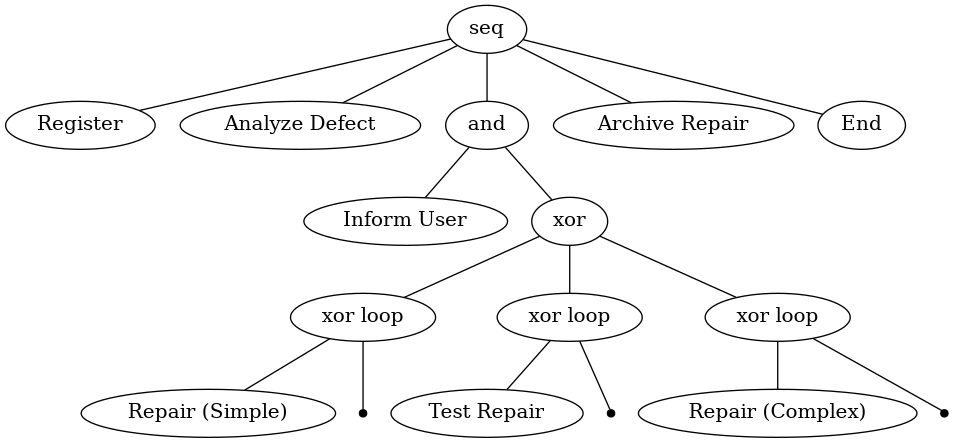

Seq5(1]Register, Analyze_Defect, And2(2]a2_s, Inform_User, Xor3(3]x3_s, Loop(4]l_s, Test_Repair, tau[4), Loop(4]l_s, Repair_Complex_, tau[4), Loop(4]l_s, Repair_Simple_, tau[4), x3_e[3), a2_e[2), Archive_Repair, End[1)
ini: Register
fin: End

Wynik: 
ForAll(~((Register) ^ (Archive_Repair)))
ForAll(~((x3_s) ^ (l_s | Repair_Complex_)))
ForAll(~((Repair_Simple_) ^ (tau)))
ForAll(~((Repair_Complex_) ^ (tau)))
Exist(a2_s)
ForAll((x3_s | x3_e) => Exist(a2_e))
ForAll(~((Register) ^ (Analyze_Defect)))
ForAll(~((l_s) ^ (tau)))
ForAll(~((a2_s | a2_e) ^ (Archive_Repair)))
ForAll(~((Test_Repair) ^ (tau)))
ForAll(~((Analyze_Defect) ^ (Archive_Repair)))
ForAll(~((l_s | Repair_Simple_) ^ (x3_e)))
ForAll((a2_s) => (Exist(Inform_User) ^ Exist(x3_s | x3_e)))
ForAll(~((l_s) ^ (Repair_Simple_)))
Exist(Register)
ForAll(~((l_s | Test_Repair) ^ (x3_e)))
ForAll(~((Register) ^ (a2_s | a2_e)))
ForAll(~((x3_s) ^ (x3_e)))
ForAll(~(((Inform_User) | (x3_s | x3_e)) ^ (a2_e)))
ForAll(~((l_s | Test_Repair) ^ (l_s | Re

In [86]:
log = pm4py.format_dataframe(pd.read_csv("Data/repairExample.csv", sep=','),
                             case_id='Case ID', activity_key='Activity', timestamp_key='Start Timestamp')

process_tree = pm4py.discover_process_tree_inductive(
    log, 1.0, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_process_tree(process_tree)
tree_to_tptp(process_tree, "our_problems/problem_4.p", rule_prefix="D")
print("\n\n\n")
print(use_provers("our_problems/problem_4.p"))

# Problem5

In [87]:
create_thesis_with_2_spec('our_problems/problem_2.p', 
                          'our_problems/problem_3.p', 'our_problems/problem_5.p', LogicFunctions.IMPLIES)
print(use_provers("our_problems/problem_5.p", verbose=True))

Output:
% Running in auto input_syntax mode. Trying TPTP
% Refutation found. Thanks to Tanya!
% SZS status Theorem for problem_5
% SZS output start Proof for problem_5
11. ? [X1] : a2_s(X1) [input]
16. ! [X1] : ~((a2_e(X1) | a2_s(X1) | x2_e(X1) | x2_s(X1)) & a2_s(X1)) [input]
122. ? [X0] : a2_s(X0) [rectify 11]
127. ! [X0] : ~((a2_e(X0) | a2_s(X0) | x2_e(X0) | x2_s(X0)) & a2_s(X0)) [rectify 16]
282. ! [X0] : ((~a2_e(X0) & ~a2_s(X0) & ~x2_e(X0) & ~x2_s(X0)) | ~a2_s(X0)) [ennf transformation 127]
386. ? [X0] : a2_s(X0) => a2_s(sK6) [choice axiom]
387. a2_s(sK6) [skolemisation 122,386]
501. a2_s(sK6) [cnf transformation 387]
516. ~a2_s(X0) | ~a2_s(X0) [cnf transformation 282]
679. ~a2_s(X0) [duplicate literal removal 516]
706. 7 <=> ! [X0] : ~a2_s(X0) [avatar definition]
707. ~a2_s(X0) <- (7) [avatar component clause 706]
787. 7 [avatar split clause 679,706]
1113. $false <- (7) [resolution 707,501]
1116. ~7 [avatar contradiction clause 1113]
1117. $false [avatar sat refutation 787,1116]
%

# Problem6

In [88]:
create_thesis_with_2_spec('our_problems/problem_3.p',
                          'our_problems/problem_4.p', 'our_problems/problem_6.p', LogicFunctions.IMPLIES)
print(use_provers("our_problems/problem_6.p"))

Error occured due to prover error. Error: list index out of range
E-prover not fond or did not work properly
HINT: Check prover path. Maybe try Linux? :)

our_problems/problem_6.p
Vampire: % SZS status Theorem for problem_6
E-Prover: No result



# Problem7

In [89]:
create_thesis_with_2_spec('our_problems/problem_1.p',
                          'our_problems/problem_4.p', 'our_problems/problem_7.p', LogicFunctions.IMPLIES)
print(use_provers("our_problems/problem_7.p"))

Error occured due to prover error. Error: list index out of range
E-prover not fond or did not work properly
HINT: Check prover path. Maybe try Linux? :)

our_problems/problem_7.p
Vampire: % SZS status Theorem for problem_7
E-Prover: No result



# Problem8

In [90]:
create_thesis_with_2_spec('our_problems/problem_2.p',
                          'our_problems/problem_3.p', 'our_problems/problem_8.p', LogicFunctions.EQUIVALENT)
print(use_provers("our_problems/problem_8.p"))

our_problems/problem_8.p
Vampire: % SZS status Theorem for problem_8
E-Prover: # SZS status ContradictoryAxioms



# Problem9

In [91]:
create_thesis_with_2_spec('our_problems/problem_3.p',
                          'our_problems/problem_4.p', 'our_problems/problem_9.p', LogicFunctions.EQUIVALENT)
print(use_provers("our_problems/problem_9.p"))

Error occured due to prover error. Error: list index out of range
E-prover not fond or did not work properly
HINT: Check prover path. Maybe try Linux? :)

our_problems/problem_9.p
Vampire: % SZS status Theorem for problem_9
E-Prover: No result



# Problem10

In [92]:
create_thesis_with_2_spec('our_problems/problem_1.p',
                          'our_problems/problem_4.p', 'our_problems/problem_10.p', LogicFunctions.EQUIVALENT)
print(use_provers("our_problems/problem_10.p"))

Error occured due to prover error. Error: list index out of range
E-prover not fond or did not work properly
HINT: Check prover path. Maybe try Linux? :)

our_problems/problem_10.p
Vampire: % SZS status Theorem for problem_10
E-Prover: No result



# Thesis

In [93]:
thesis5 = '''
fof(thesis, conjecture, (
    ! [X]: (register_request(X) => ?[Y]: (reject_request(Y) | pay_compensation(Y)))
)).
'''
thesis6 = '''
fof(thesis, conjecture, (
    ! [X]: (~(reject_request(X) & pay_compensation(X)))
)).
'''
thesis7 = '''
fof(thesis, conjecture, (
    ! [X]: (register(X) => ?[Y]: (repair_simple(Y) | repair_complex(Y)))
)).
'''
thesis8 = '''
fof(thesis, conjecture, (
    ! [X]: (~(inform_user(X) & tau(X)))
)).
'''

# Problem11

In [94]:
with open('our_problems/problem_1.p', 'r') as f:
    text = f.read()

text += '\n\n' + thesis5
with open('our_problems/problem_11.p', 'w') as f:
    f.write(text)

print(use_provers("our_problems/problem_11.p"))

our_problems/problem_11.p
Vampire: % SZS status Theorem for problem_11
E-Prover: # SZS status Theorem



# Problem12

In [95]:
with open('our_problems/problem_1.p', 'r') as f:
    text = f.read()

text += '\n\n' + thesis6
with open('our_problems/problem_12.p', 'w') as f:
    f.write(text)

print(use_provers("our_problems/problem_12.p"))

our_problems/problem_12.p
Vampire: % SZS status Theorem for problem_12
E-Prover: # SZS status Theorem



# Problem13

In [96]:
with open('our_problems/problem_3.p', 'r') as f:
    text = f.read()

text += '\n\n' + thesis7
with open('our_problems/problem_13.p', 'w') as f:
    f.write(text)

print(use_provers("our_problems/problem_13.p"))

our_problems/problem_13.p
Vampire: % SZS status CounterSatisfiable for problem_13
E-Prover: # SZS status CounterSatisfiable



# Problem14

In [97]:
with open('our_problems/problem_3.p', 'r') as f:
    text = f.read()

text += '\n\n' + thesis8
with open('our_problems/problem_14.p', 'w') as f:
    f.write(text)

print(use_provers("our_problems/problem_14.p"))

our_problems/problem_14.p
Vampire: % SZS status Theorem for problem_14
E-Prover: # SZS status Theorem



# Problem15

In [98]:
with open('our_problems/problem_4.p', 'r') as f:
    text = f.read()

text += '\n\n' + thesis7
with open('our_problems/problem_15.p', 'w') as f:
    f.write(text)

print(use_provers("our_problems/problem_15.p"))

Error occured due to prover error. Error: list index out of range
E-prover not fond or did not work properly
HINT: Check prover path. Maybe try Linux? :)

our_problems/problem_15.p
Vampire: % SZS status ContradictoryAxioms for problem_15
E-Prover: No result



# Problem16

In [99]:
with open('our_problems/problem_4.p', 'r') as f:
    text = f.read()

text += '\n\n' + thesis8
with open('our_problems/problem_16.p', 'w') as f:
    f.write(text)

print(use_provers("our_problems/problem_16.p"))

Error occured due to prover error. Error: list index out of range
E-prover not fond or did not work properly
HINT: Check prover path. Maybe try Linux? :)

our_problems/problem_16.p
Vampire: % SZS status ContradictoryAxioms for problem_16
E-Prover: No result



# Run all

In [101]:
folder = 'problems'

res = []

problem_files = sorted([f for f in os.listdir(folder) if f.endswith('.p')])
for problem_file in problem_files:
    res.append(use_provers(os.path.join(folder, problem_file)))

print('\n\n\n')
for r in res:
    print(r)

Error occured due to prover error. Error: list index out of range
E-prover not fond or did not work properly
HINT: Check prover path. Maybe try Linux? :)

Error occured due to prover error. Error: list index out of range
E-prover not fond or did not work properly
HINT: Check prover path. Maybe try Linux? :)

Error occured due to prover error. Error: list index out of range
E-prover not fond or did not work properly
HINT: Check prover path. Maybe try Linux? :)

Error occured due to prover error. Error: list index out of range
E-prover not fond or did not work properly
HINT: Check prover path. Maybe try Linux? :)

Error occured due to prover error. Error: list index out of range
E-prover not fond or did not work properly
HINT: Check prover path. Maybe try Linux? :)

Error occured due to prover error. Error: list index out of range
E-prover not fond or did not work properly
HINT: Check prover path. Maybe try Linux? :)

Error occured due to prover error. Error: list index out of range
E-pr